## 诺贝尔奖

### 1 数据集
从1901年开始到2016年所有获奖者的数据集。

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
nobel = pd.read_csv('datasets/nobel.csv')
nobel.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
### 2 有多少诺贝尔奖、获奖者的性别、出生国家
counts = len(nobel['prize'])
display(counts)
#性别分布情况
display(nobel['sex'].value_counts())
#获得诺贝尔奖较多的国家有哪些？
nobel['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

### 3 美国什么时候开始占据领先地位的？

In [4]:
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
#增加年代column，通过np.floor和astype来完成
nobel['decade'] = (np.floor(nobel['year']/10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade',as_index=False)['usa_born_winner'].mean()

prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


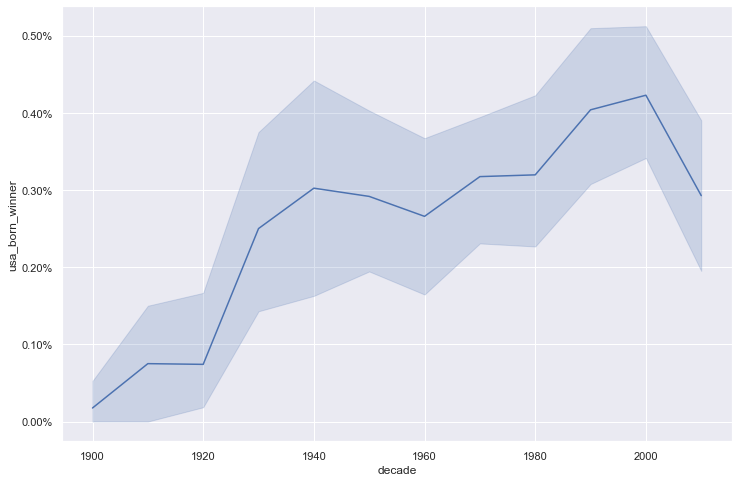

In [5]:
sns.set()
plt.rcParams['figure.figsize'] = [12, 8]
ax = sns.lineplot('decade','usa_born_winner',data=nobel)
#将标签格式化为百分比
ax.yaxis.set_major_formatter(PercentFormatter())

### 4 性别分布情况

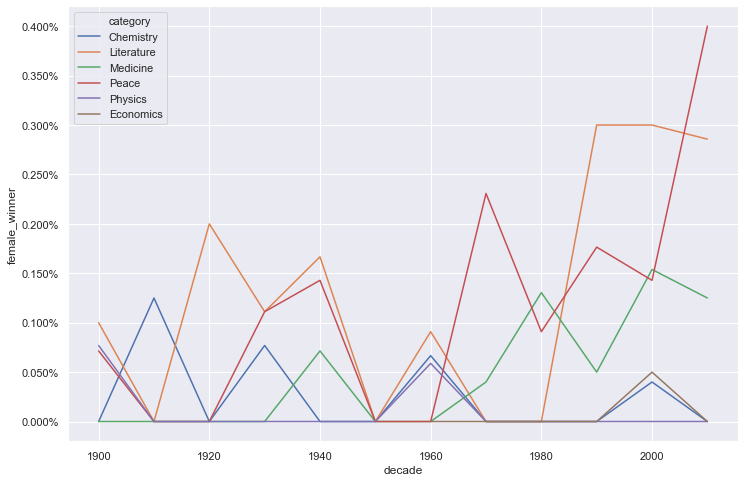

In [6]:
nobel['female_winner'] = nobel['sex'] == "Female"
prop_female_winners = nobel.groupby(['decade','category'],as_index=False)['female_winner'].mean()

plt.rcParams['figure.figsize'] = [12, 8]
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)

ax.yaxis.set_major_formatter(PercentFormatter())

### 5 第一位拿诺贝尔奖的女性

In [7]:
nobel=nobel[nobel['sex'] == "Female"]
nobel.nsmallest(1,'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


### 6 多次拿诺贝尔奖的


In [8]:
nobel.groupby('full_name').filter(lambda group: len(group)>=2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True


### 7 年龄分布情况

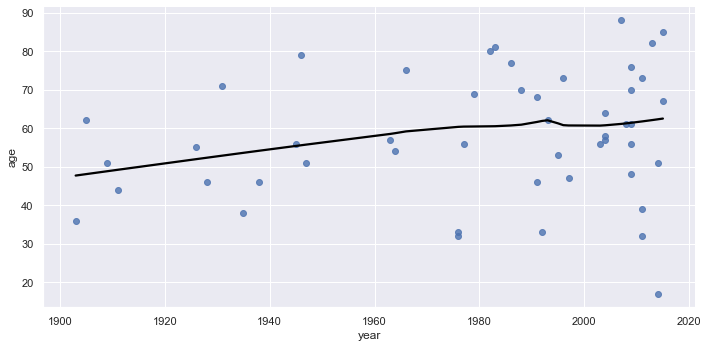

In [9]:
# 出生日期变为datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# 计算年龄
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot('year','age',data=nobel,lowess=True, aspect=2,line_kws={'color':'black'})

### 8 不同诺贝尔奖项的年龄分布

In [25]:
sns.set()
sns.lmplot(x='year',y='age',data=nobel,lowess=True, aspect=2,line_kws={'color':'black'},row="category")

IndexError: invalid index to scalar variable.

### 9 最年轻和最年长的获奖者

In [24]:
nobel.nlargest(1, 'age')
nobel.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17
